<a href="https://colab.research.google.com/github/kaihcodes/employment_bboomervsmill_in_python/blob/main/hollywoodmovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://public.tableau.com/app/sample-data/HollywoodsMostProfitableStories.csv')
df.info()
df.head()
df.tail()
#there are a few null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
69,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.367646,2008
70,When in Rome,Comedy,Disney,44.0,NaN,15.0,43.040000,2010
71,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.660000,2010
72,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.620000,2010
73,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,41.941000,2008


In [2]:
#looking at all the null data, 5 in total
df[df.isna().any(axis=1)]
#there are 2 few null values I can't impute, but Something borrowed has a 14% rateing on rotten tomator, so I will replace the null
df.loc[df['Film'] == 'Something Borrowed', 'Rotten Tomatoes %'] = 14
df[df.isna().any(axis=1)]

#no reserveation also is missing lead studio, i found warner bros seems to be the studio, can replace the na value, but I want to see if warner bros already exist
df['Lead Studio'].unique()
#Warner Bros., make sure spelling is consistent
df.loc[df['Film'] == 'No Reservations', 'Lead Studio'] = 'Warner Bros.'
df[df.isna().any(axis=1)]
#so now only 4 rows with less na in the data
#also I am realizing audience score% is the popcornmeter on rotten tomatoes
df.info()
df.loc[df['Film'] == 'Something Borrowed', 'Audience  score %'] = 48
df[df.isna().any(axis=1)]
df.info()
#only 3 na, all from profitability column
df.dropna(inplace=True)
df.info()

#see if there are duplicates
df.duplicated(keep=False).unique()
#no duplicates detected, great


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        74 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  74 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        74 non-null     object 
 3   Audience 

array([False])

In [3]:
df.head(20)
#sort by year
df.sort_values(by=['Year'], ascending=True).head(20)
df.sort_values(by=['Year'],ascending=True).tail(20)

#sort by year and profitability
df.sort_values(by=['Year','Profitability'],ascending=[True,False]).head(20)

#most profitable movie
df[df['Profitability'] == df['Profitability'].max()]
#wow, made 67 times the cost and I never even heard of this movie
#least profitable movie
df[df['Profitability'] == df['Profitability'].min()]
#highest grossing movie
df[df['Worldwide Gross'] == df['Worldwide Gross'].max()]
df.sort_values(by=['Worldwide Gross'],ascending=False)
#twilight, of course
#highest rated movie
df.sort_values(by=['Rotten Tomatoes %'], ascending=False)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
67,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432,2008
7,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652,2007
31,Midnight in Paris,Romance,Sony,84.0,8.744706,93.0,148.660000,2011
21,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261,2007
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
...,...,...,...,...,...,...,...,...
20,Killers,Action,Lionsgate,45.0,1.245333,11.0,93.400000,2010
24,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224,2007
36,New Year's Eve,Romance,Warner Bros.,48.0,2.536429,8.0,142.040000,2011
65,Waiting For Forever,Romance,Independent,53.0,0.005000,6.0,0.025000,2011


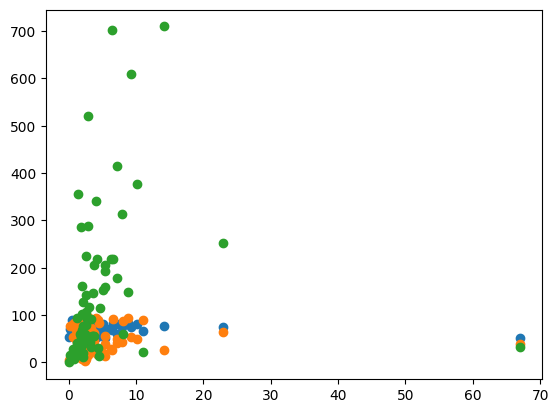

In [4]:
#do some pivoting
df.groupby(['Year'])['Profitability'].max()
#but doesn't show me which movie it is
df.loc[df.groupby(['Year'])['Profitability'].idxmax()] #use idxmax to get index

df.groupby(['Genre'])['Profitability'].max()
df.loc[df.groupby(['Genre'])['Profitability'].idxmax()]

df.loc[df.groupby(['Year','Genre'])['Profitability'].idxmax()]
df.groupby(['Year','Genre','Lead Studio'])[['Worldwide Gross']].max()

#movies where profit double
df.head(10)
df['Profit'] = np.where(df['Profitability'] >= 1,'High','Low')
df.head(10)

def rating(x):
  if (x['Rotten Tomatoes %'] >= 50) & (x['Audience  score %'] >= 50):
    return 'High'
  elif (x['Rotten Tomatoes %'] > 50) & (x['Audience  score %'] < 50):
    return 'Med'
  elif (x['Rotten Tomatoes %'] < 50) & (x['Audience  score %'] > 50):
    return 'Med'
  else:
    return 'Low'

df['Rating'] = df.apply(rating,axis=1)
df.head(20)
df.sample(20)

#see which studio has the most profitable movies
df.groupby('Lead Studio')['Profit'].count()
#df.groupby('Genre')['Profit'].count()

#plot profit and others, scatterplot
plt.figure(1)
plt.scatter(df['Profitability'],df['Audience  score %']) #there is an outlier
#plt.figure(2)
plt.scatter(df['Profitability'],df['Rotten Tomatoes %'])
#plt.figure(3)
plt.scatter(df['Profitability'],df['Worldwide Gross'])


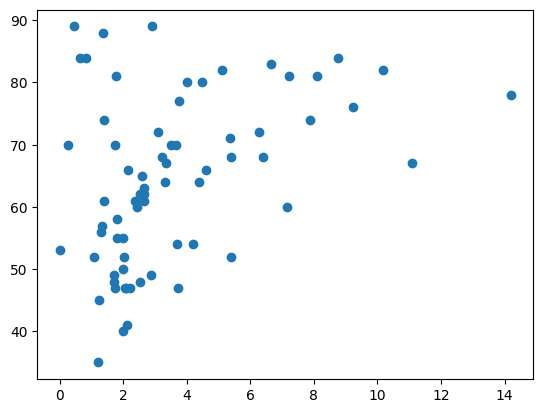

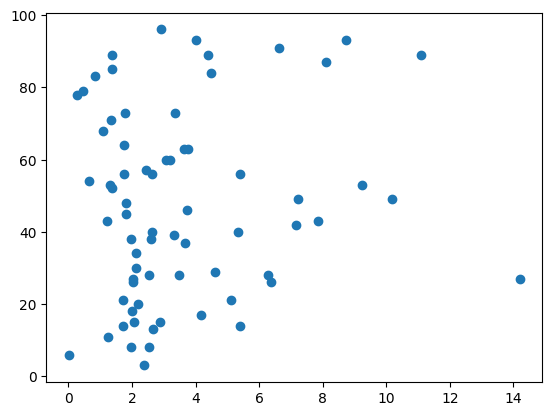

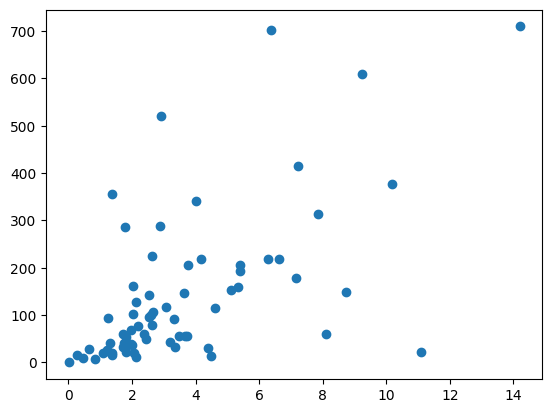

In [6]:
#find that outlier, take it out before studying correlation
df = df[df['Profitability'] < 20]

plt.figure(1)
plt.scatter(df['Profitability'],df['Audience  score %'])
plt.figure(2)
plt.scatter(df['Profitability'],df['Rotten Tomatoes %'])
plt.figure(3)
plt.scatter(df['Profitability'],df['Worldwide Gross'])

#see covariance
#if there are correlation between profit and other variables
#try both pearson and kendall


In [16]:
df.head()
from statistics import covariance
covariance(df['Profitability'],df['Worldwide Gross'])
#there is a positive correlation between these 2 variables
df['Profitability'].corr(df['Worldwide Gross'],method='pearson')
#a strongish correlation, 60%


np.float64(0.6030102820220358)